In [101]:
from pathlib import Path
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# %pip install scikit-learn
from sklearn.model_selection import train_test_split
from pathlib import Path
# %pip install matplotlib
import matplotlib.pyplot as plt
import glob
import random
from PIL import Image
import numpy as np

# Larger CNN Model
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Normalization

In [102]:
pixel = 37

In [103]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/train', 
                                                                 color_mode='grayscale', 
                                                                 batch_size=10000,
                                                                 image_size=(pixel, pixel),
                                                                 seed = 42)

Found 9043 files belonging to 15 classes.


In [104]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/test',
                                                                color_mode='grayscale',
                                                                batch_size=10000,
                                                                image_size=(pixel, pixel),
                                                                seed = 42)

Found 3000 files belonging to 15 classes.


In [105]:
valdation_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/validation',
                                                                        color_mode='grayscale',
                                                                        batch_size=10000,
                                                                        image_size=(pixel, pixel),
                                                                        seed = 42)

Found 3000 files belonging to 15 classes.


In [106]:
for image, label in train_data:
    X_train = image
    y_train = label

X_train = X_train/255
y_train = to_categorical(y_train,15)

In [107]:
for image, label in test_data:
    X_test = image
    y_test = label

X_test = X_test/255
y_test = to_categorical(y_test,15)

In [108]:
for image, label in valdation_data:
    X_validate = image
    y_validate = label

X_validate = X_validate/255
y_validate = to_categorical(y_validate,15)

In [109]:
print(X_validate.shape)
print(X_test.shape)
print(X_train.shape)    
print(y_train.shape)

(3000, 37, 37, 1)
(3000, 37, 37, 1)
(9043, 37, 37, 1)
(9043, 15)


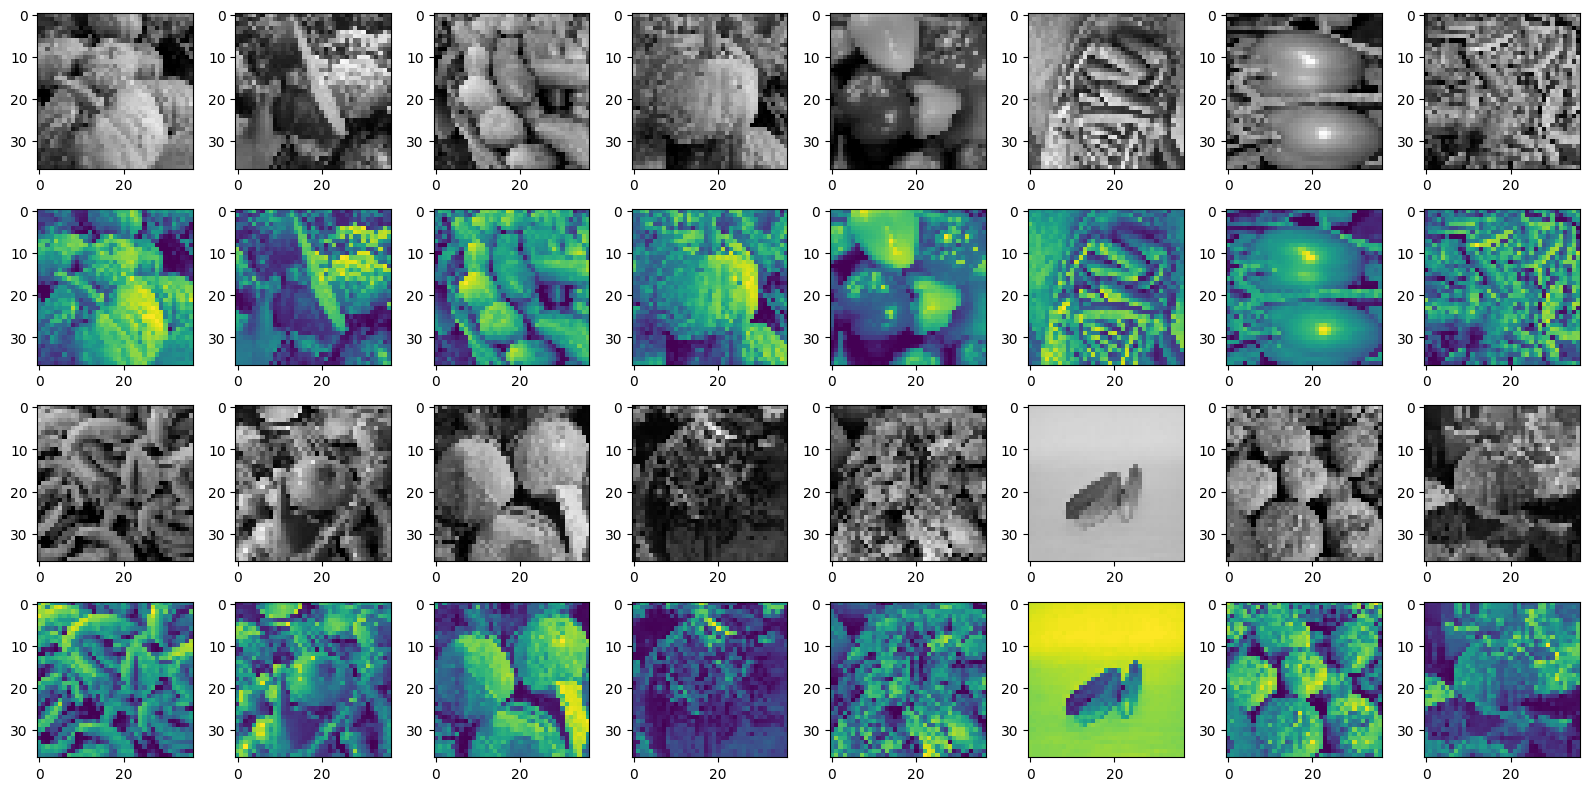

In [110]:
rows = 2 # defining number of rows in figure
cols = 8 # defining number of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows*2,cols,(2*i*cols)+(j+1))
        plt.imshow(tf.image.grayscale_to_rgb(X_train[i*cols + j]))
        plt.axis("on")

    for j in range(cols):
        f.add_subplot(rows*2,cols,((2*i+1)*cols) +(j+1))
        plt.imshow(X_train[i*cols + j])
        plt.axis("on")

plt.tight_layout()
plt.show()

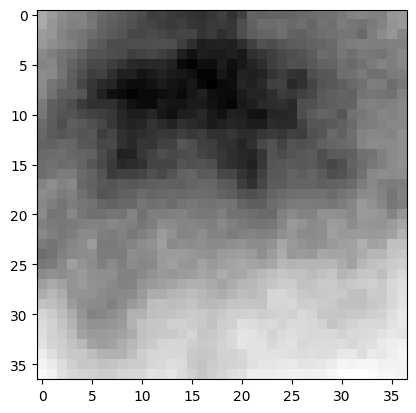

In [111]:
plt.imshow(np.mean(X_train, axis=0), cmap='Greys')
plt.show()

<Axes: >

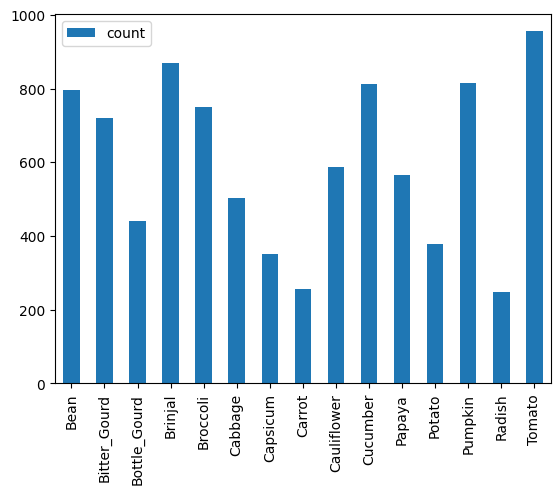

In [112]:
import pandas as pd
images_length={}
for i, cat in enumerate(os.listdir('./Dataset for CA1 part A - AY2425S1/train')):
        
        # Load images for the ith category
        image_path = "./Dataset for CA1 part A - AY2425S1/train" + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
        
pd.DataFrame(images_length,index = ['count']).T.plot(kind='bar')

In [113]:
from sklearn import preprocessing

<h1>Normalizing the dataset</h1>

In [114]:
# # fix random seed for reproducibility
# from tensorflow.keras.layers import BatchNormalization

# seed = 88
# np.random.seed(seed)
# # load data
# num_classes = y_test.shape[1]
# # build the model
# # create model
# Baseline = Sequential([
#     Dense(128,input_shape=(37, 37, 1), activation='relu'),
#     Dense(128,input_shape=(37, 37, 1), activation='relu'),
#     Dense(128,input_shape=(37, 37, 1) , activation='relu'),
#     Dense(num_classes,  activation='softmax')
# ])

# Baseline.compile(loss='categorical_crossentropy',
#  optimizer='adam', metrics=['accuracy'])

# Baseline.summary()

In [115]:
# print(X_train.shape)
# print(y_train.shape)
# # print(X_validate.shape)
# print(y_validate.shape)

In [116]:
# baseModelHistory = Baseline.fit(X_train, y_train, epochs=100, validation_data=(X_validate, y_validate), batch_size=200)

<h1>Model Fitting</h1>

In [117]:
# fix random seed for reproducibility
from tensorflow.keras.layers import BatchNormalization

seed = 88
np.random.seed(seed)
# load data
num_classes = y_test.shape[1]
# build the model
# create model
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(37, 37, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# Compile modelZ
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

model.summary()
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose=0)
monitor_val_loss = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
# Fit the model
train_history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=200, verbose=1, callbacks=[monitor_val_acc,monitor_val_loss])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 33, 33, 30)        780       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 30)        8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 30)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 30)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1470)            

UnimplementedError: Graph execution error:

Detected at node 'sequential_21/conv2d_6/Relu' defined at (most recent call last):
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\asyncio\windows_events.py", line 316, in run_forever
      super().run_forever()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\p2348935\AppData\Local\Temp\ipykernel_12168\2129875856.py", line 36, in <module>
      train_history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=200, verbose=1, callbacks=[monitor_val_acc,monitor_val_loss])
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\p2348935\.conda\envs\gpu_env\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_21/conv2d_6/Relu'
DNN library is not found.
	 [[{{node sequential_21/conv2d_6/Relu}}]] [Op:__inference_train_function_13008]

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

# Extracting data
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']


accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 9))

# Plotting loss and validation loss
axs[0].plot(loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plotting accuracy and validation accuracy
axs[1].plot(accuracy, label='Training Accuracy')
axs[1].plot(val_accuracy, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()